In [1]:
# Beyond Bitswap Test Bed
# Be able to create a yaml file custom.

In [2]:
import ui
l = ui.Layout()
l.show()
#display(l.testcase, l.input_data, l.file_size, l.files_directory, l.run_count, \
#    l.n_nodes, l.n_leechers, l.n_passive, l.max_peer_connections, l.churn_rate)


GridspecLayout(children=(Text(value='', description='Testcase', layout=Layout(grid_area='widget001')), Text(va…

In [3]:
# Building config and running testcase
import utils
#testid = utils.runner(utils.process_yaml_config("./config.yaml"))
testid = utils.runner(utils.process_layout_config(l))

Running as:  testground run single --plan=beyond-bitswap --builder=exec:go --runner=local:exec --build-cfg skip_runtime_image=true --testcase=ipfs-transfer --instances=4 -tp input_data=random -tp file_size=12345,23456 -tp leech_count=2 -tp passive_count=0 -tp max_connection_rate=100 -tp run_count=2 -tp bandwidth_mb=100 -tp latency_ms=10 -tp jitter_pct=5 -tp enable_tcp=true
Run completed successfully with testID: 7dd099302e3e


In [4]:
# Collecting the data.
import utils
utils.collect_data(l, testid)

Cleaning previous runs..

Sep 28 07:56:37.054366	INFO	using home directory: /home/adlrocha/testground
Sep 28 07:56:37.054504	INFO	.env.toml loaded from: /home/adlrocha/testground/.env.toml
Sep 28 07:56:37.054511	INFO	testground client initialized	{"addr": "http://localhost:8042"}

>>> Result:

Sep 28 07:56:37.286511	INFO	created file: a810a79c6cec.tgz

a810a79c6cec/.
a810a79c6cec/single
a810a79c6cec/single/0
a810a79c6cec/single/0/diagnostics.out
a810a79c6cec/single/0/results.out
a810a79c6cec/single/0/run.err
a810a79c6cec/single/0/run.out
a810a79c6cec/single/1
a810a79c6cec/single/1/diagnostics.out
a810a79c6cec/single/1/results.out
a810a79c6cec/single/1/run.err
a810a79c6cec/single/1/run.out
a810a79c6cec/single/10
a810a79c6cec/single/10/diagnostics.out
a810a79c6cec/single/10/results.out
a810a79c6cec/single/10/run.err
a810a79c6cec/single/10/run.out
a810a79c6cec/single/11
a810a79c6cec/single/11/diagnostics.out
a810a79c6cec/single/11/results.out
a810a79c6cec/single/11/run.err
a810a79c6cec/si

In [5]:
import process
agg, testcases = process.aggregate_results('./results')
byLatency = process.groupBy(agg, "latencyMS")
byNodeType = process.groupBy(agg, "nodeType")
byFileSize = process.groupBy(agg, "fileSize")
byBandwidth = process.groupBy(agg, "bandwidthMB")
byTopology = process.groupBy(agg, "topology")

./results/7dd099302e3e/single/0/results.out
./results/7dd099302e3e/single/2/results.out
./results/7dd099302e3e/single/1/results.out
./results/7dd099302e3e/single/3/results.out


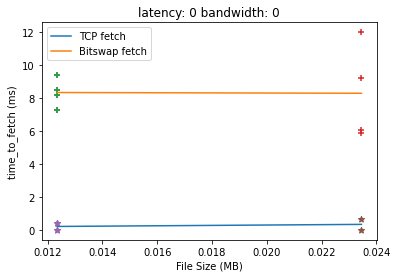

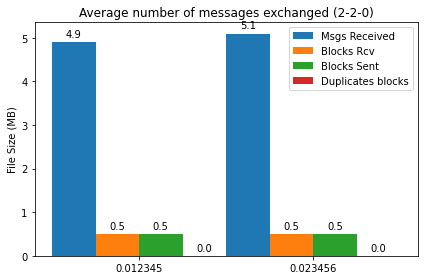

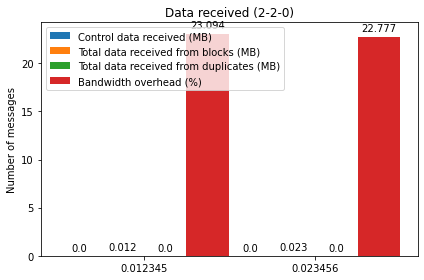

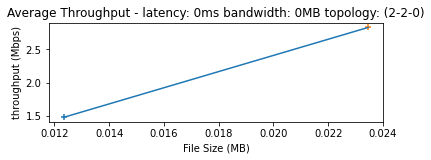

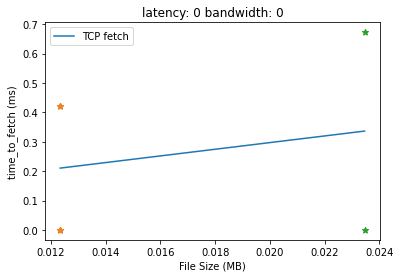

In [6]:
process.plot_latency(byLatency, byBandwidth, byFileSize)
process.plot_messages(byFileSize, byTopology)
process.plot_bw_overhead(byFileSize, byTopology)
process.plot_througput(byLatency, byBandwidth, byFileSize, byTopology, testcases)
process.plot_tcp_latency(byLatency, byBandwidth, byFileSize)


In [4]:
# Run from config file
import ui
l = ui.ConfigLayout()
l.show()


GridspecLayout(children=(Text(value='', description='Config dir', layout=Layout(grid_area='widget001')),), lay…